In [1]:
#Import Libraries
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
#Importing Data from GitHub
import pandas as pd
url = 'https://raw.githubusercontent.com/landen5/USGS-project/main/MultiVarAnalysis_AnnualShorelines_NEW_RAW_DATA.xlsx%20-%20Data(focused)%20(1).csv'
df = pd.read_csv(url)

In [3]:
#Formatting Data for 3d Graph
time = pd.Series(dtype = 'float64')
transect = pd.Series(dtype = 'float64')
distance = pd.Series(dtype = 'float64')
wave_power = pd.Series(dtype = 'float64')
i = 0
j = 0
while i<len(df.columns)-2:
    time = pd.concat([time,df['WY']], ignore_index=True)
    distance = pd.concat([distance,df[str(i)]],ignore_index = True)
    wave_power = pd.concat([wave_power,df['Wave Power']], ignore_index = True)
    while j<len(df[str(i)]):
        transect = pd.concat([transect,pd.Series(i)])
        j+=1
    j = 0
    i+=1
#Scaling and Vertically Shifting Wave Power
scaled_wave_power = 40*wave_power - 40

In [4]:
#set up figure size and DPI(dots per inch: resolution) for screen demo
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=150

<IPython.core.display.Javascript object>


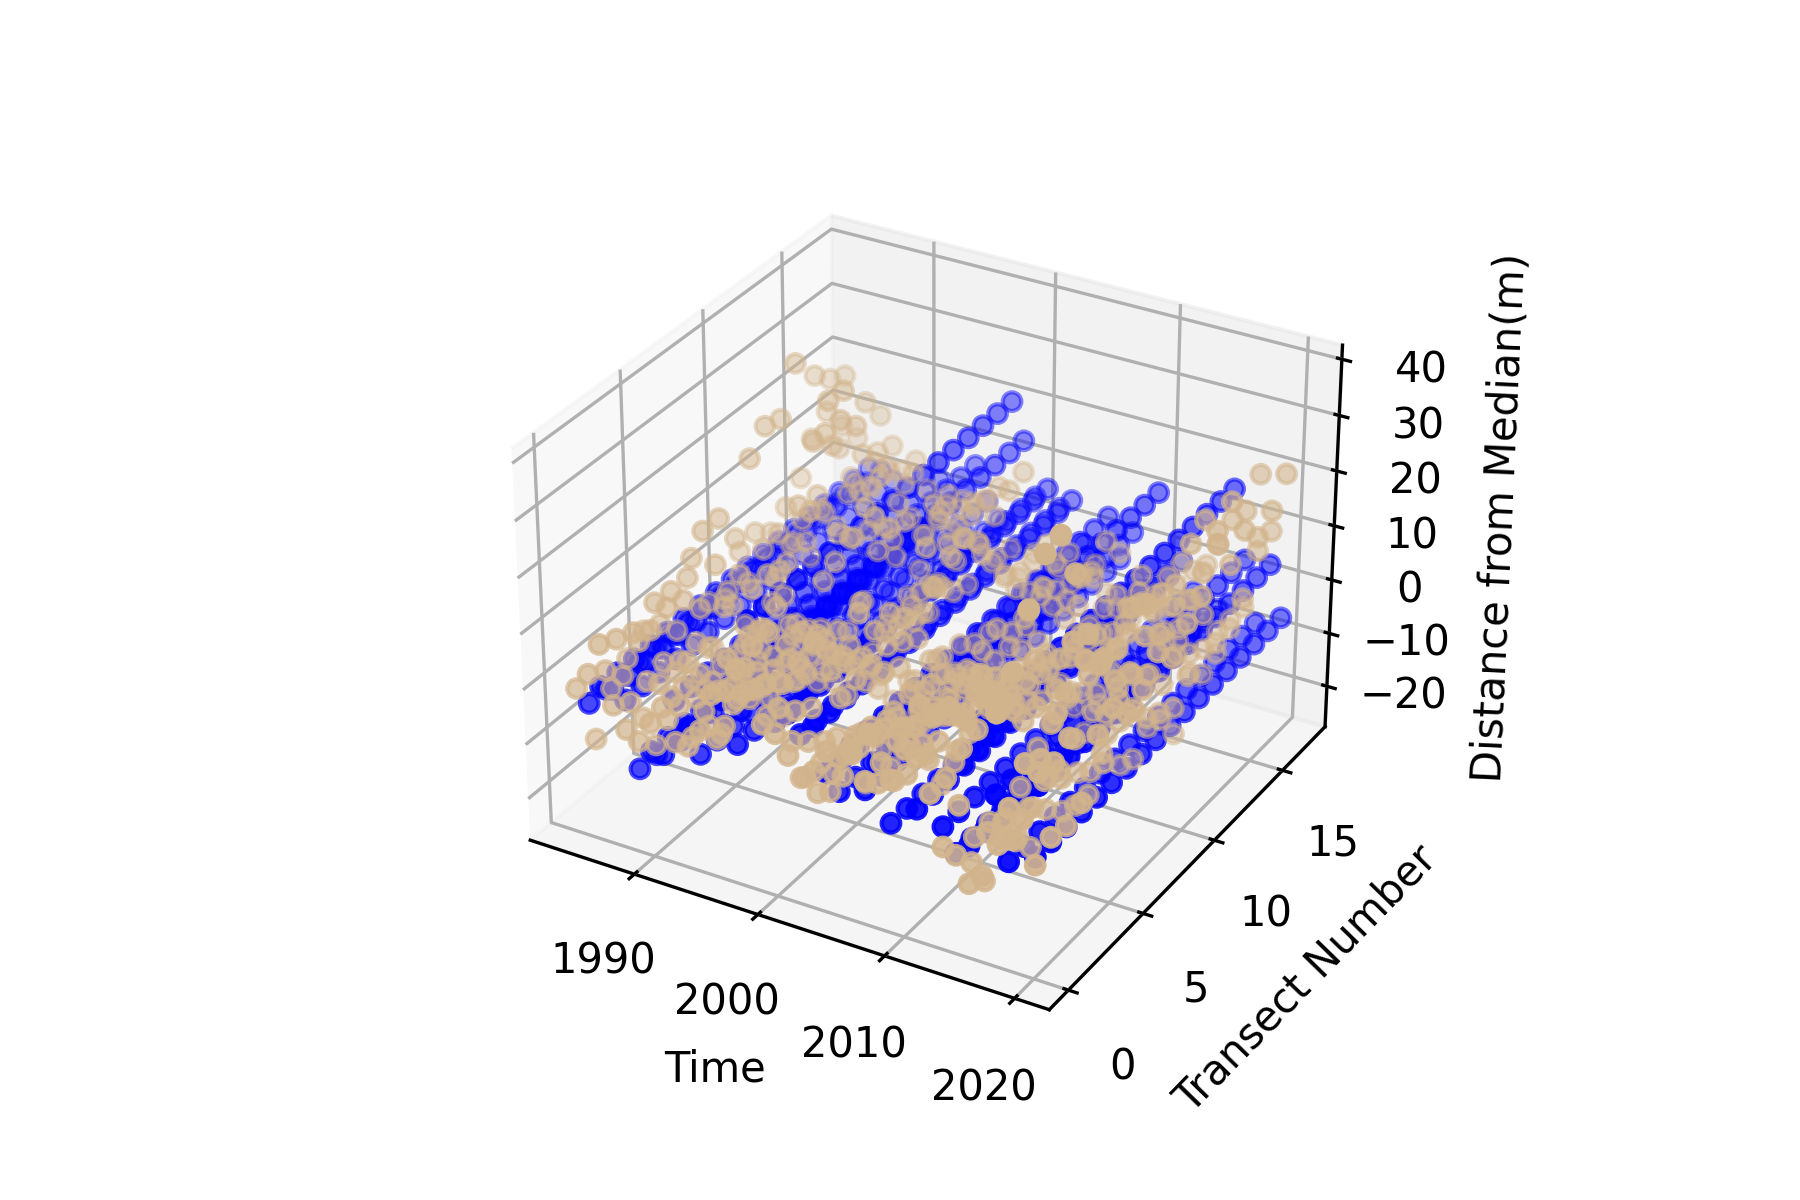

Text(0.5, 0, 'Distance from Median(m)')

In [5]:
#Add a 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(time,transect,distance, color = 'tan')
ax.scatter(time,transect,scaled_wave_power, color = 'blue')
ax.set_xlabel('Time')
ax.set_ylabel('Transect Number')
ax.set_zlabel('Distance from Median(m)')

17.27744621
21.78632998
30.07782899
37.1679266
38.01606827
29.04759291
12.44298084
11.73069088
16.43730167
14.73085817
17.68761624
23.07957759
26.17324906
28.45408107
17.3798079
21.29691208
18.48761115
20.66942109


<IPython.core.display.Javascript object>


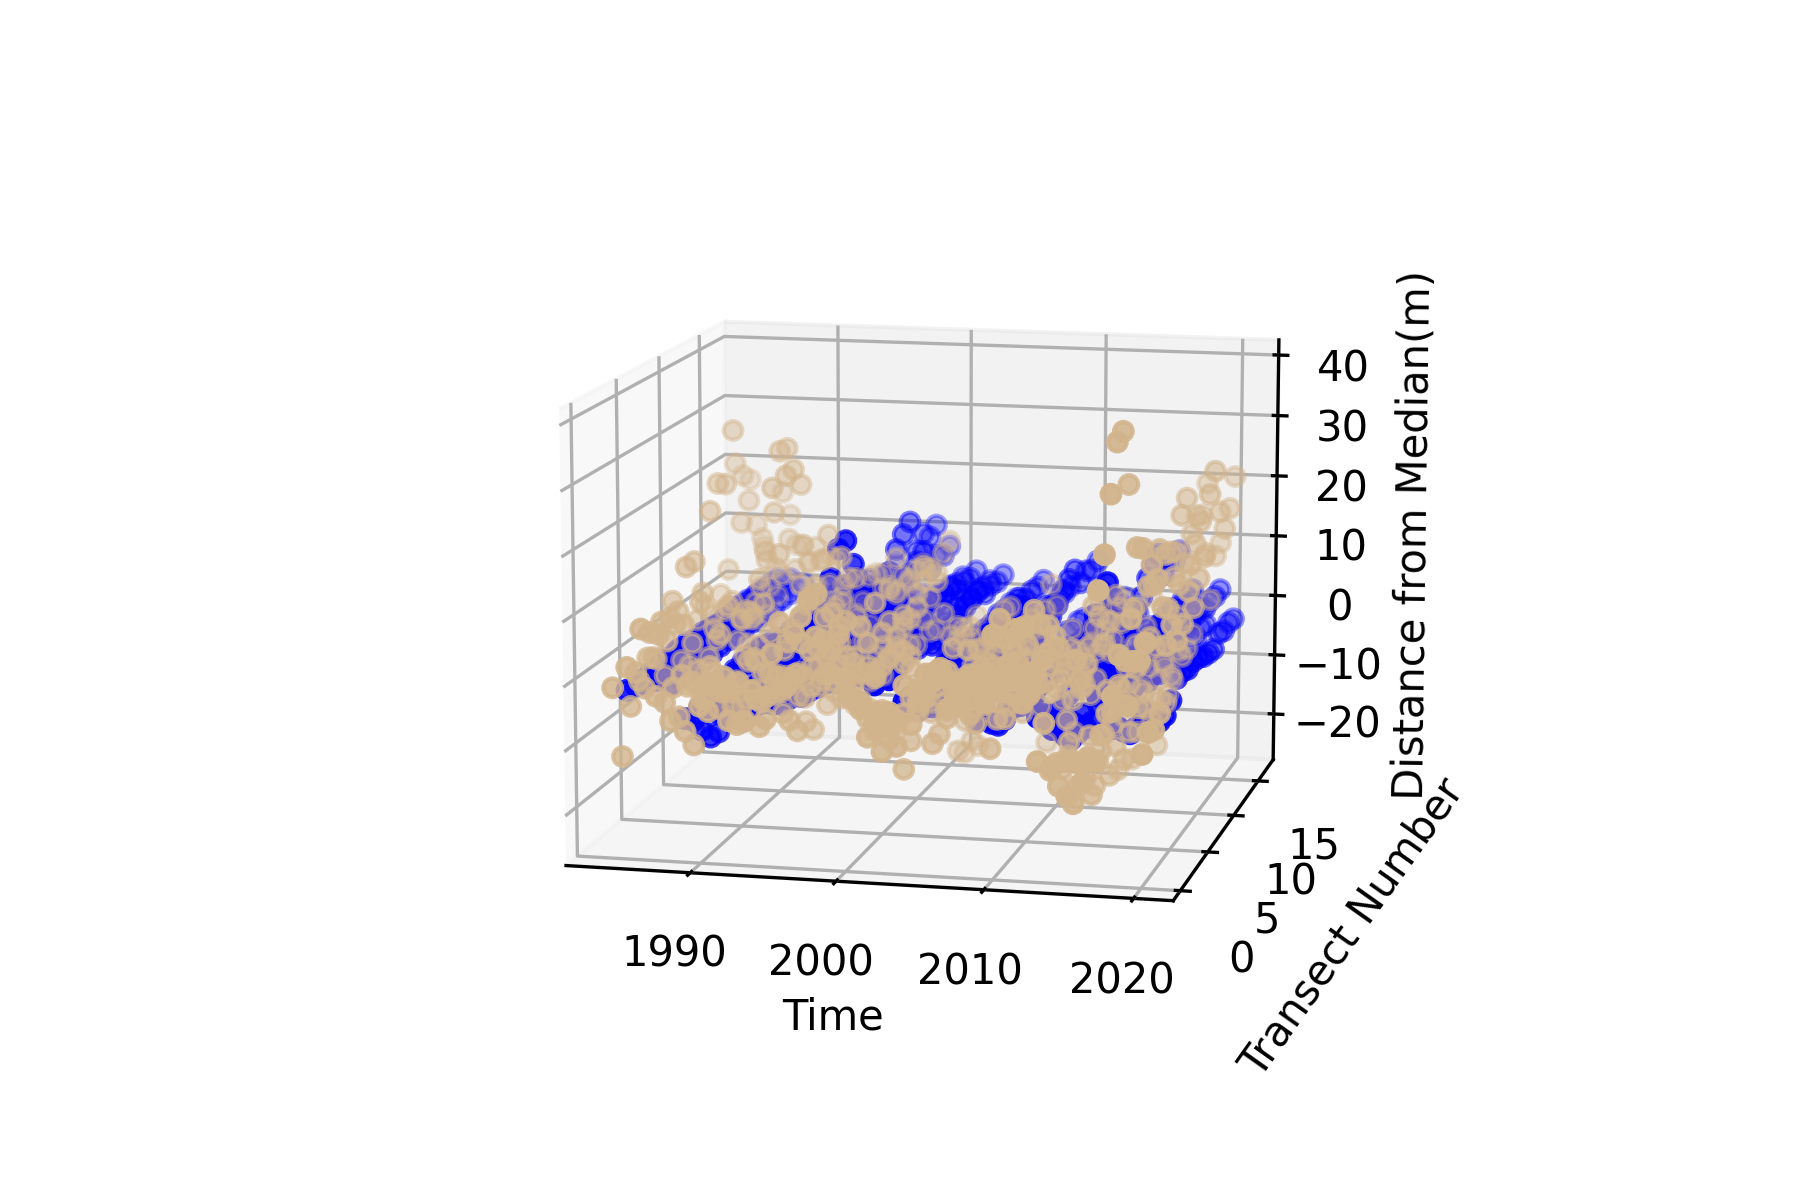

Text(0.5, 0, 'Distance from Median(m)')

In [17]:
#Scale Wave Power By Transect 
i = 0
individual_scaled_wave_power = pd.Series(dtype = 'float64')
while i<len(df.columns)-2:
    scalar = df[str(i)].max()
    print(scalar)
    individual_scaled_wave_power = pd.concat([individual_scaled_wave_power,df['Wave Power']*scalar-scalar], ignore_index = True)
    j = 0
    i+=1
#Add a 3D Scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(time,transect,distance, color = 'tan')
ax.scatter(time,transect,individual_scaled_wave_power, color = 'blue')
ax.set_xlabel('Time')
ax.set_ylabel('Transect Number')
ax.set_zlabel('Distance from Median(m)')


<IPython.core.display.Javascript object>


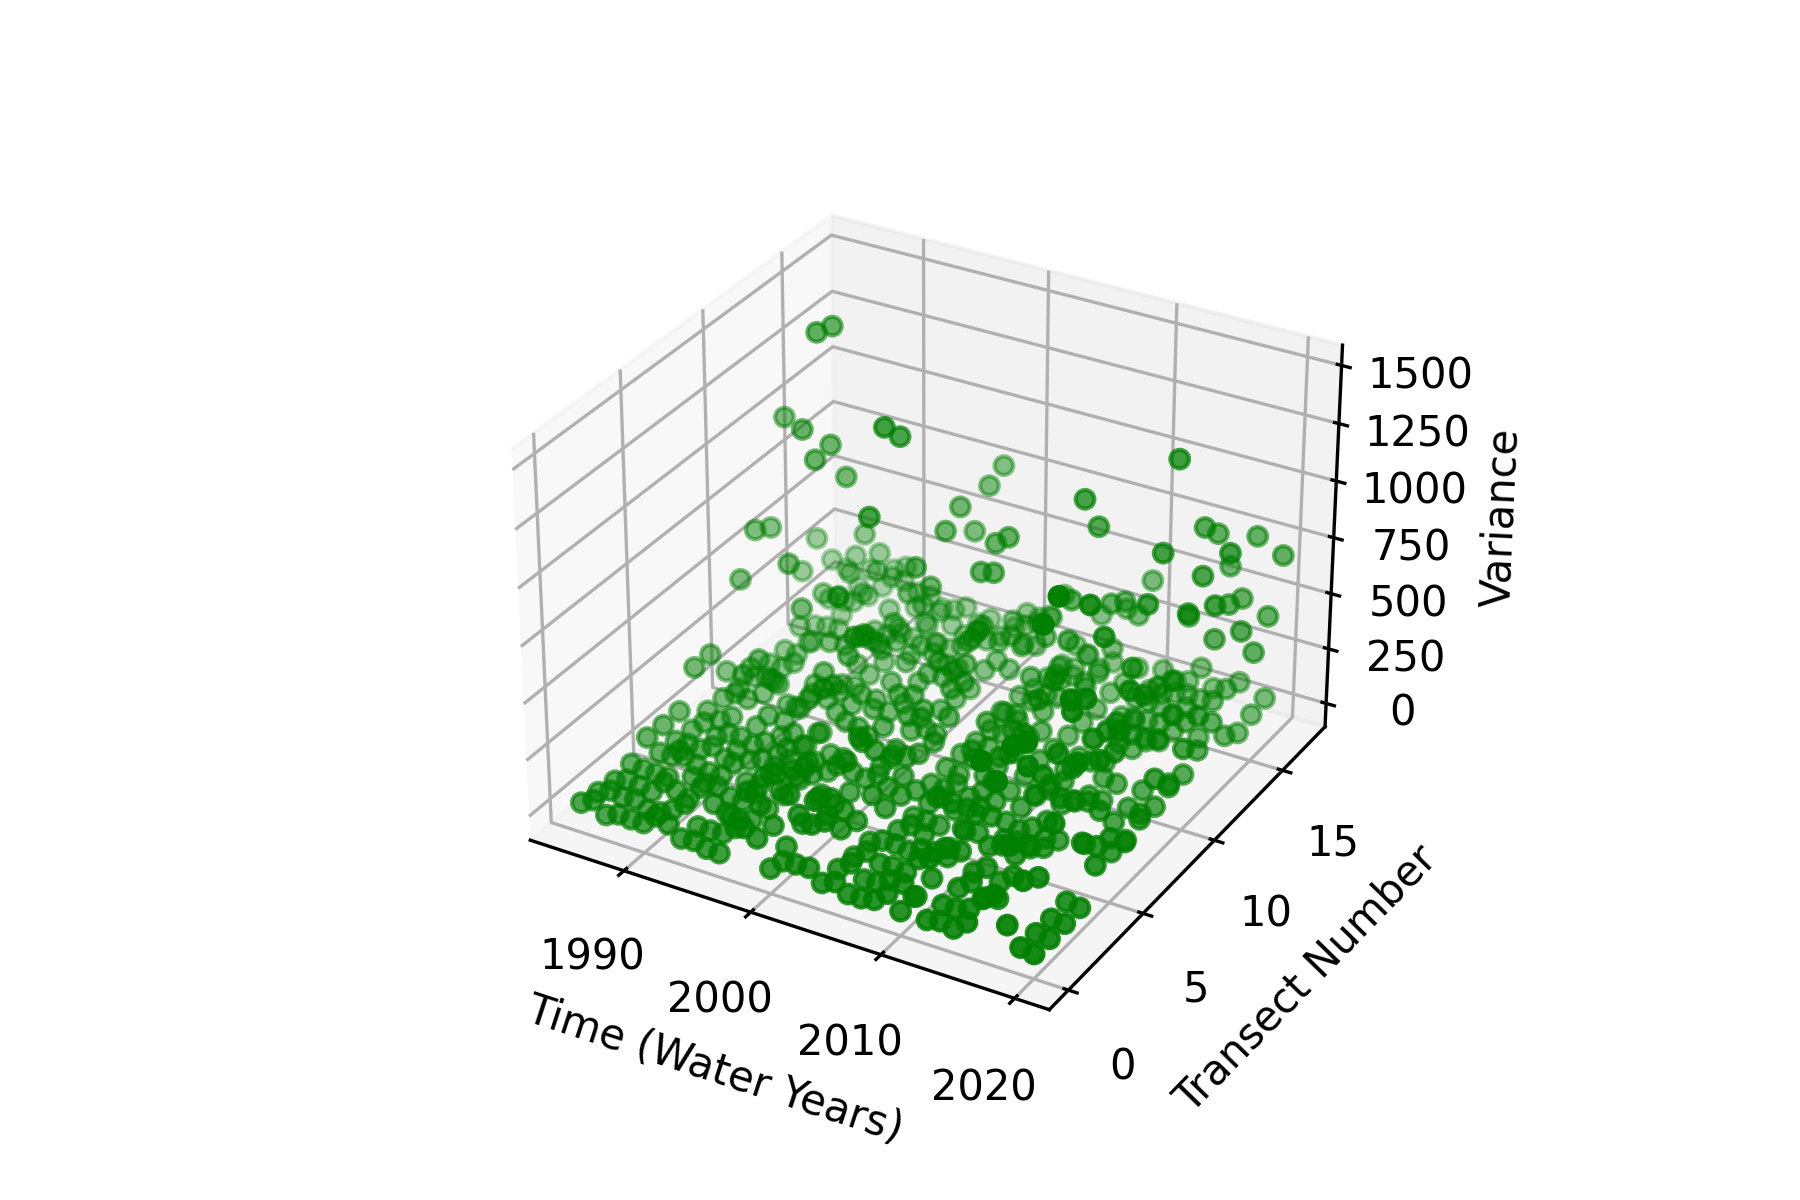

Text(0.5, 0, 'Variance')

In [12]:
#Compute Variance Between Transect Distance and Water Power
variance = pd.Series(dtype = 'float64')
variance = (scaled_wave_power-distance)**2
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(time,transect,variance, color = 'green')
ax.set_xlabel('Time (Water Years)')
ax.set_ylabel('Transect Number')
ax.set_zlabel('Variance For Uniform Scalar')

In [7]:
#Find Average Variance
variance_sum = variance.sum()
average_variance = variance_sum/len(variance)
print('average variance: '+ str(round(average_variance,0)))

average variance: 135.0


<IPython.core.display.Javascript object>


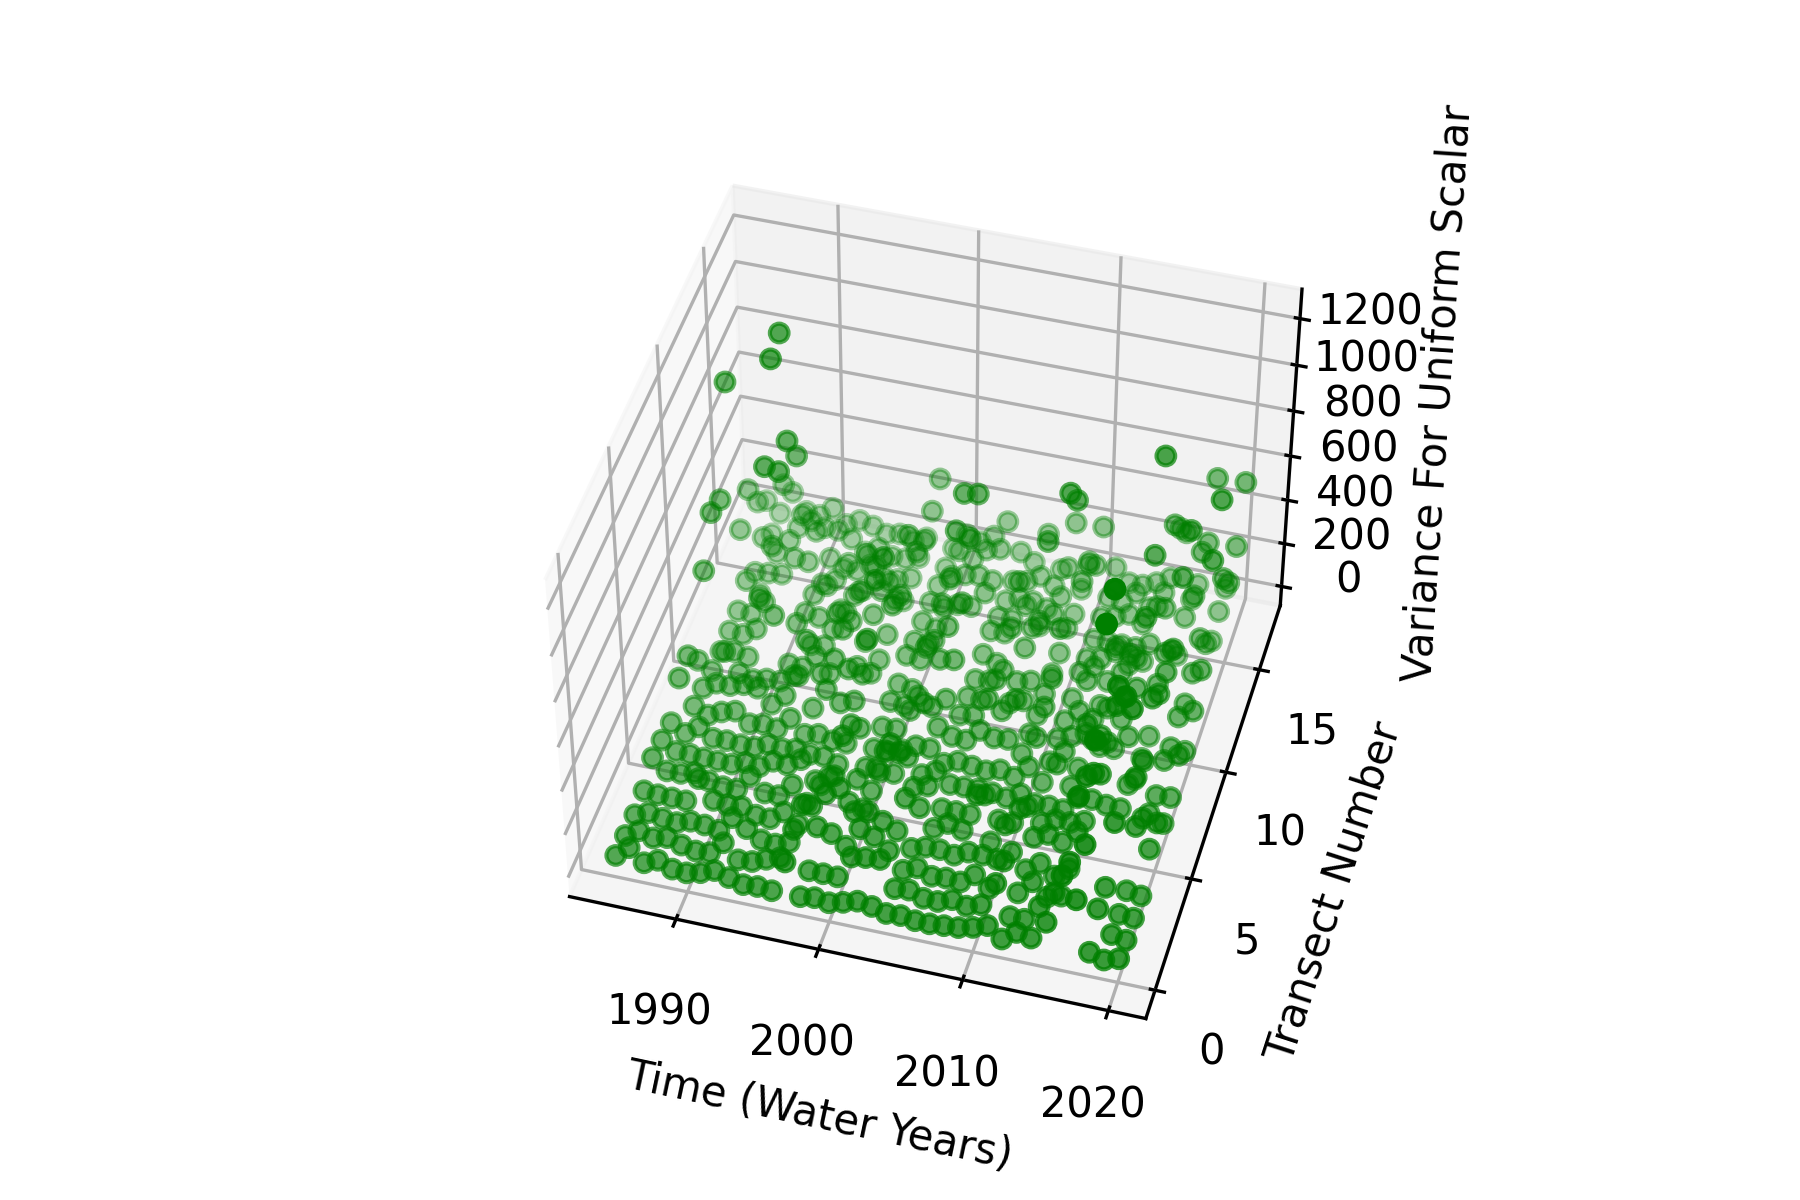

Text(0.5, 0, 'Variance For Uniform Scalar')

In [18]:
#Compute Variance Between Transect Distance and Water Power
individual_variance = pd.Series(dtype = 'float64')
individual_variance = (individual_scaled_wave_power-distance)**2
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(time,transect,individual_variance, color = 'green')
ax.set_xlabel('Time (Water Years)')
ax.set_ylabel('Transect Number')
ax.set_zlabel('Variance For Uniform Scalar')

In [20]:
#Find Average Variance
variance_sum = individual_variance.sum()
average_variance = variance_sum/len(individual_variance)
print('average variance: '+ str(round(average_variance,0)))

average variance: 97.0
